In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [105]:
base = pd.read_csv("../Data/credito.csv")
base.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [106]:
base.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [107]:
print(base['Emprego'].value_counts(dropna=False))
print(base['ResidenciaDesde'].value_counts(dropna=False))
print(base['Habitacao'].value_counts(dropna=False))

Emprego
3.0    338
2.0    247
4.0    172
1.0    171
5.0     62
NaN     10
Name: count, dtype: int64
ResidenciaDesde
4.0    409
2.0    308
3.0    147
1.0    129
NaN      7
Name: count, dtype: int64
Habitacao
1.0    709
3.0    175
2.0    107
NaN      9
Name: count, dtype: int64


In [108]:
# Criando colunas indicadoras de nulos e preenchendo com a moda
# Emprego
base['Emprego_nulo'] = base['Emprego'].isnull().astype(int)
base['Emprego'] = base['Emprego'].fillna(base['Emprego'].mode()[0])

# ResidenciaDesde
base['ResidenciaDesde_nulo'] = base['ResidenciaDesde'].isnull().astype(int)
base['ResidenciaDesde'] = base['ResidenciaDesde'].fillna(base['ResidenciaDesde'].mode()[0])

# Habitacao
base['Habitacao_nulo'] = base['Habitacao'].isnull().astype(int)
base['Habitacao'] = base['Habitacao'].fillna(base['Habitacao'].mode()[0])

In [109]:
X = base.drop('Status', axis=1)
y = base['Status']

In [110]:
print(y.value_counts())

Status
1    700
0    300
Name: count, dtype: int64


In [111]:
X_treino.isnull().sum()

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Emprego_nulo            0
ResidenciaDesde_nulo    0
Habitacao_nulo          0
dtype: int64

In [138]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

# Garantindo que o y_treino e y_teste serão 1D ([0, 1, 0, 1, 1...])
y_treino = y_treino.values.ravel()
y_teste = y_teste.values.ravel()

In [139]:
floresta = RandomForestClassifier(n_estimators=100, class_weight='balanced')
floresta.fit(X_treino, y_treino)

RandomForestClassifier(class_weight='balanced')

In [147]:
y_pred = best_model.predict(X_teste)
print("\nRelatório de classificação no teste:")
print(classification_report(y_teste, y_pred))


Relatório de classificação no teste:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        75
           1       0.93      0.96      0.95       225

    accuracy                           0.92       300
   macro avg       0.91      0.88      0.89       300
weighted avg       0.92      0.92      0.92       300



In [148]:
print(f"Acurácia no teste: {accuracy_score(y_teste, y_pred):.4f}")

Acurácia no teste: 0.9200


In [142]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [143]:
matriz = confusion_matrix(y_teste, y_pred)
matriz

array([[ 59,  16],
       [  8, 217]])

In [144]:
taxa_acerto = accuracy_score(y_teste, y_pred)
taxa_acerto

0.92

In [145]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.07999999999999996

In [134]:
print(best_model)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=800)


In [135]:
type(best_model)

sklearn.ensemble._forest.RandomForestClassifier

In [120]:
importances = floresta.feature_importances_

In [17]:
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importancias_df = importancias_df.sort_values(by='Importance', ascending=False)

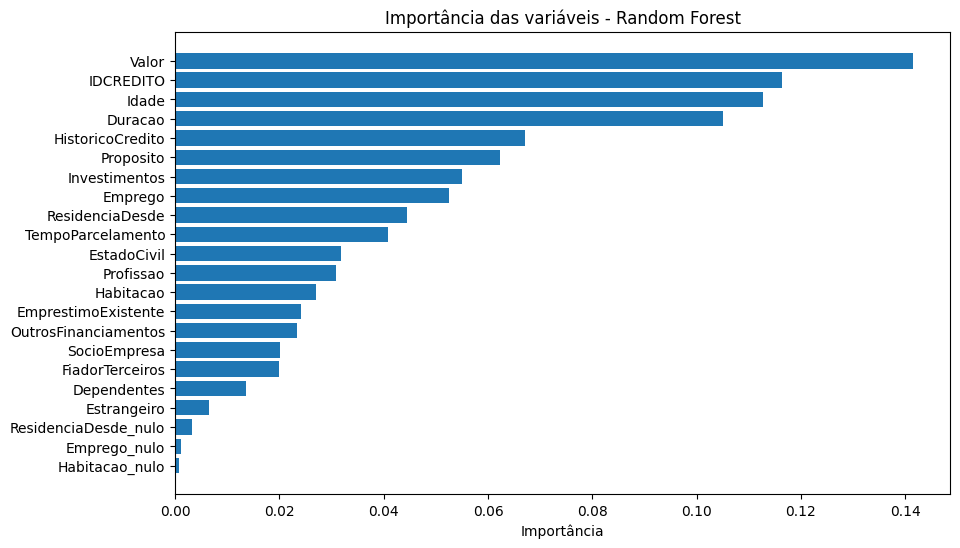

In [18]:
plt.figure(figsize=(10,6))
plt.barh(importancias_df['Feature'], importancias_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.title('Importância das variáveis - Random Forest')
plt.show()

In [149]:
# Verificar os parâmetros do modelo que foi treinado
print(floresta.get_params())

# Verificar os parâmetros do best_model
print(best_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
